# Real-world Study: How do k-Means and k-Medians Fair in Clustering Real Datasets?
### Author: Daniel Wang

In [1]:
import math
import numpy as np
import sklearn.preprocessing as skpp
import sklearn.datasets as skds
import sklearn.decomposition as skdc

import time
import itertools

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib.colors as colors
import pandas as pd
import seaborn as sns

import sys
import os
cwd = os.getcwd()
sys.path.append(cwd + '/modules/')

from kgencenters import KGenCenters # this is our custom class

## The Iris Dataset (4 dimensions, 3 classes)

In [2]:
# import the iris dataset
iris = skds.load_iris()
iris_X = iris.data
iris_y = iris.target

# scale the data
iris_X = skpp.StandardScaler().fit_transform(iris_X)


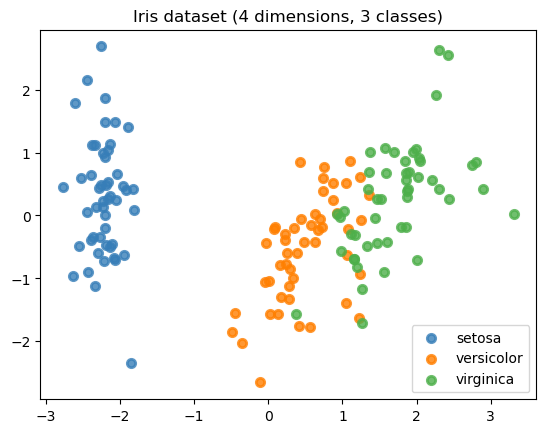

In [3]:
# Perform PCA
iris_pca = skdc.PCA(n_components=2)
iris_X_pca = iris_pca.fit_transform(iris_X)

# Define colors
colors = np.array(list(itertools.islice(itertools.cycle(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']), len(np.unique(iris_y)))))

# Create plot
plt.figure()
for color, i, target_name in zip(colors, np.unique(iris_y), iris.target_names):
    plt.scatter(iris_X_pca[iris_y == i, 0], iris_X_pca[iris_y == i, 1], color=color, alpha=.8, lw=2,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Iris dataset (4 dimensions, 3 classes)')
plt.show()


In [4]:
# Define the cost metrics
cost_metrics = ['squared_euclidean', 'euclidean']

# Store the accuracies in an array
iris_accuracies = np.zeros((1,2))

# Create a 1x2 dictionary to store the accuracy records
iris_accuracy_dict = {cost: [] for cost in cost_metrics}

for c,cost in enumerate(cost_metrics):
    # Initialize the KGenCenters object with 'forgy' initialization
    kgen = KGenCenters(n_clusters=3, init='forgy', max_iter=400, random_state=None, verbose=False)

    n_trials = 100
    iris_acc_record = np.empty(n_trials)
    for trial in range(n_trials):
        # Set the random state
        kgen.random_state = trial
        # Fit the model
        kgen.fit(iris_X, cost_metric=cost, tolerance=1e-5, max_steps=100)
        # Compute the accuracy
        iris_acc_record[trial] = kgen.evaluate(iris_y)
    # Compute the mean of the accuracies
    iris_accuracies[0,c] = np.mean(iris_acc_record)
    # Store the accuracy records
    iris_accuracy_dict[cost] = iris_acc_record


## The Seeds Dataset (7 dimensions, 3 classes)

In [5]:
# import the seeds dataset
seeds_df = pd.read_csv('data/Seed_Data.csv')
seeds_X = seeds_df.iloc[:, :-1].values  # assuming the last column is the target
seeds_y = seeds_df.iloc[:, -1].values  # assuming the last column is the target

# scale the data
seeds_X = skpp.StandardScaler().fit_transform(seeds_X)


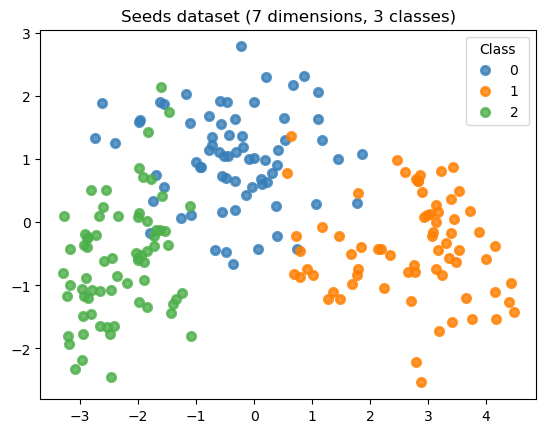

In [6]:
# Perform PCA
seeds_pca = skdc.PCA(n_components=2)
seeds_X_pca = seeds_pca.fit_transform(seeds_X)

# Define colors
colors = np.array(list(itertools.islice(itertools.cycle(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']), len(np.unique(seeds_y)))))

# Create plot
plt.figure()
for color, i in zip(colors, np.unique(seeds_y)):
    plt.scatter(seeds_X_pca[seeds_y == i, 0], seeds_X_pca[seeds_y == i, 1], color=color, alpha=.8, lw=2, label=str(i) + " ")

# Create a legend with padding
legend = plt.legend(loc='best', shadow=False, scatterpoints=1, title='Class')

plt.title('Seeds dataset (7 dimensions, 3 classes)')
plt.show()


In [7]:
# Store the accuracies in an array
seeds_accuracies = np.zeros((1,2))

# Create a 1x2 dictionary to store the accuracy records
seeds_accuracy_dict = {cost: [] for cost in cost_metrics}

for c, cost in enumerate(cost_metrics):
    # Initialize the KGenCenters object with 'forgy' initialization
    kgen = KGenCenters(n_clusters=3, init='forgy', max_iter=400, random_state=None, verbose=False)

    n_trials = 100
    seeds_acc_record = np.empty(n_trials)
    for trial in range(n_trials):
        # Set the random state
        kgen.random_state = trial
        # Fit the model
        kgen.fit(seeds_X, cost_metric=cost, tolerance=1e-5, max_steps=100)
        # Compute the accuracy
        seeds_acc_record[trial] = kgen.evaluate(seeds_y)
    # Compute the mean of the accuracies
    seeds_accuracies[0, c] = np.mean(seeds_acc_record)
    # Store the accuracy records
    seeds_accuracy_dict[cost] = seeds_acc_record


## The E. Coli Dataset (7 dimensions, 8 classes)

In [8]:
# import the E. Coli dataset
# the files are ecoli.data and ecoli.names
ecoli_df = pd.read_csv('data/ecoli/ecoli.data', header=None, sep='\s+')
ecoli_X = ecoli_df.iloc[:, 1:-1].values  # assuming the last column is the target
ecoli_y = ecoli_df.iloc[:, -1].values  # assuming the last column is the target

# scale the data
ecoli_X = skpp.StandardScaler().fit_transform(ecoli_X)


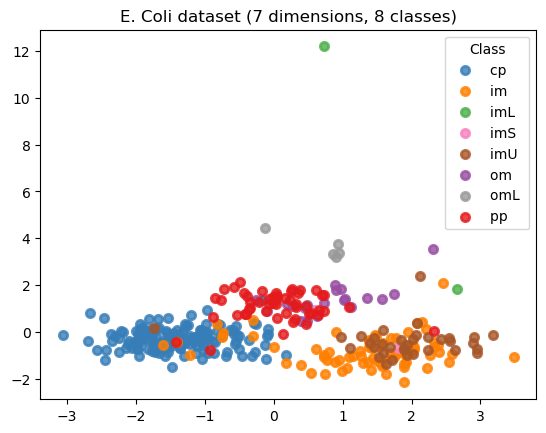

In [9]:
# Perform PCA
ecoli_pca = skdc.PCA(n_components=2)
ecoli_X_pca = ecoli_pca.fit_transform(ecoli_X)

# Define colors
colors = np.array(list(itertools.islice(itertools.cycle(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']), len(np.unique(ecoli_y)))))

# Create plot
plt.figure()
for color, i in zip(colors, np.unique(ecoli_y)):
    plt.scatter(ecoli_X_pca[ecoli_y == i, 0], ecoli_X_pca[ecoli_y == i, 1], color=color, alpha=.8, lw=2, label=str(i) + " ")

# Create a legend with padding
legend = plt.legend(loc='best', shadow=False, scatterpoints=1, title='Class')

plt.title('E. Coli dataset (7 dimensions, 8 classes)')
plt.show()


In [10]:
# Create a label (category) encoder object
le = skpp.LabelEncoder()

# Fit the encoder to the pandas column
le.fit(ecoli_y)

# Apply the fitted encoder to the pandas column
ecoli_y = le.transform(ecoli_y) 

# Store the accuracies in an array
ecoli_accuracies = np.zeros((1,2))

# Create a 1x2 dictionary to store the accuracy records
ecoli_accuracy_dict = {cost: [] for cost in cost_metrics}

for c,cost in enumerate(cost_metrics):
    # Initialize the KGenCenters object with 'forgy' initialization
    kgen = KGenCenters(n_clusters=3, init='forgy', max_iter=400, random_state=None, verbose=False)  # change n_clusters as needed

    n_trials = 100
    ecoli_acc_record = np.empty(n_trials)
    for trial in range(n_trials):
        # Set the random state
        kgen.random_state = trial
        # Fit the model
        kgen.fit(ecoli_X, cost_metric=cost, tolerance=1e-5, max_steps=100)
        # Compute the accuracy
        ecoli_acc_record[trial] = kgen.evaluate(ecoli_y)
    # Compute the mean of the accuracies
    ecoli_accuracies[0,c] = np.mean(ecoli_acc_record)
    # Store the accuracy records
    ecoli_accuracy_dict[cost] = ecoli_acc_record


## The Glass Dataset (9 dimensions, 6 classes)

In [11]:
# Manually enter the names of the columns based on the .names file
column_names = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'class']  # Replace with actual column names

# Load the dataset
glass = pd.read_csv('data/glass/glass.data', names=column_names)

# Split the data into X and y
glass_X = glass.drop('class', axis=1) 
glass_y = glass['class']

# Encode the class labels to integers if they are not
le = skpp.LabelEncoder()
glass_y = le.fit_transform(glass_y)

# Standardize the features
scaler = skpp.StandardScaler()
glass_X = scaler.fit_transform(glass_X)


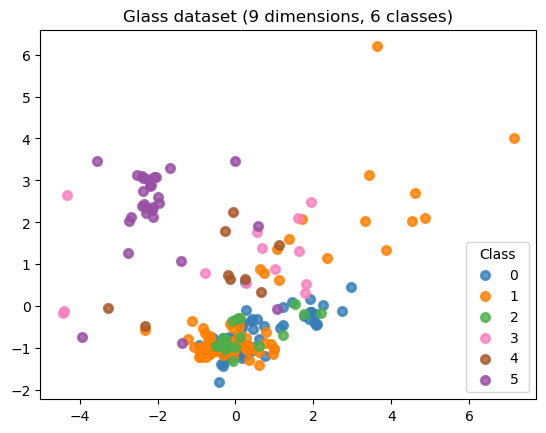

In [12]:
# Perform PCA
glass_pca = skdc.PCA(n_components=2)
glass_X_pca = glass_pca.fit_transform(glass_X)

# Define colors
colors = np.array(list(itertools.islice(itertools.cycle(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']), len(np.unique(glass_y)))))

# Create plot
plt.figure()
for color, i in zip(colors, np.unique(glass_y)):
    plt.scatter(glass_X_pca[glass_y == i, 0], glass_X_pca[glass_y == i, 1], color=color, alpha=.8, lw=2, 
                label=str(i) + " ")
# Create a legend with padding
legend = plt.legend(loc='best', shadow=False, scatterpoints=1, title='Class')

plt.title('Glass dataset (9 dimensions, 6 classes)')
plt.show()


In [13]:
# Store the accuracies in an array
glass_accuracies = np.zeros((1,2))

# Create a 1x2 dictionary to store the accuracy records
glass_accuracy_dict = {cost: [] for cost in cost_metrics}

for c,cost in enumerate(cost_metrics):
    # Initialize the KGenCenters object with 'forgy' initialization
    kgen = KGenCenters(n_clusters=len(np.unique(glass_y)), init='forgy', max_iter=400, random_state=None, verbose=False)  

    n_trials = 100
    glass_acc_record = np.empty(n_trials)
    for trial in range(n_trials):
        # Set the random state
        kgen.random_state = trial
        # Fit the model
        kgen.fit(glass_X, cost_metric=cost, tolerance=1e-5, max_steps=100)
        # Compute the accuracy
        glass_acc_record[trial] = kgen.evaluate(glass_y)
    # Compute the mean of the accuracies
    glass_accuracies[0,c] = np.mean(glass_acc_record)
    # Store the accuracy records
    glass_accuracy_dict[cost] = glass_acc_record


## The Wine Dataset (13 dimensions, 3 classes)

In [14]:
# import the wine dataset
wine = skds.load_wine()
wine_X = wine.data
wine_y = wine.target

# scale the data
wine_X = skpp.StandardScaler().fit_transform(wine_X)


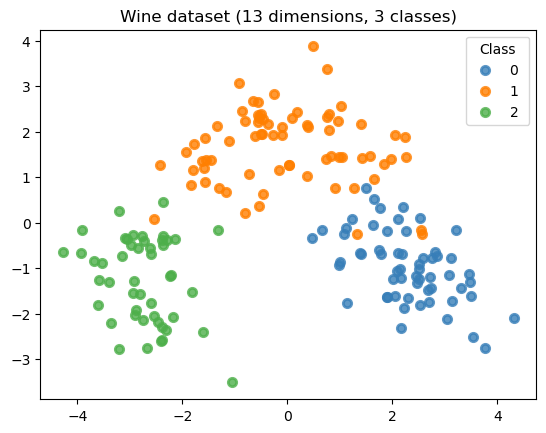

In [15]:
# Perform PCA
wine_pca = skdc.PCA(n_components=2)
wine_X_pca = wine_pca.fit_transform(wine_X)

# Define colors
colors = np.array(list(itertools.islice(itertools.cycle(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']), len(np.unique(wine_y)))))

# Create plot
plt.figure()
for color, i in zip(colors, np.unique(wine_y)):
    plt.scatter(wine_X_pca[wine_y == i, 0], wine_X_pca[wine_y == i, 1], color=color, alpha=.8, lw=2,
                label=str(i) + " ")

# Create a legend with padding
legend = plt.legend(loc='best', shadow=False, scatterpoints=1, title='Class')

plt.title('Wine dataset (13 dimensions, 3 classes)')
plt.show()


In [16]:
# Store the accuracies in an array
wine_accuracies = np.zeros((1,2))

# Create a 1x2 dictionary to store the accuracy records
wine_accuracy_dict = {cost: [] for cost in cost_metrics}

for c,cost in enumerate(cost_metrics):
    # Initialize the KGenCenters object with 'forgy' initialization
    kgen = KGenCenters(n_clusters=3, init='forgy', max_iter=400, random_state=None, verbose=False)

    n_trials = 100
    wine_acc_record = np.empty(n_trials)
    for trial in range(n_trials):
        # Set the random state
        kgen.random_state = trial
        # Fit the model
        kgen.fit(wine_X, cost_metric=cost, tolerance=1e-5, max_steps=100)
        # Compute the accuracy
        wine_acc_record[trial] = kgen.evaluate(wine_y)
    # Compute the mean of the accuracies
    wine_accuracies[0,c] = np.mean(wine_acc_record)
    # Store the accuracy records
    wine_accuracy_dict[cost] = wine_acc_record


## The Breast Cancer Dataset (30 dimensions, 2 classes)

In [17]:
# import the breast cancer dataset
breast_cancer = skds.load_breast_cancer()
breast_cancer_X = breast_cancer.data
breast_cancer_y = breast_cancer.target

# scale the data
breast_cancer_X = skpp.StandardScaler().fit_transform(breast_cancer_X)


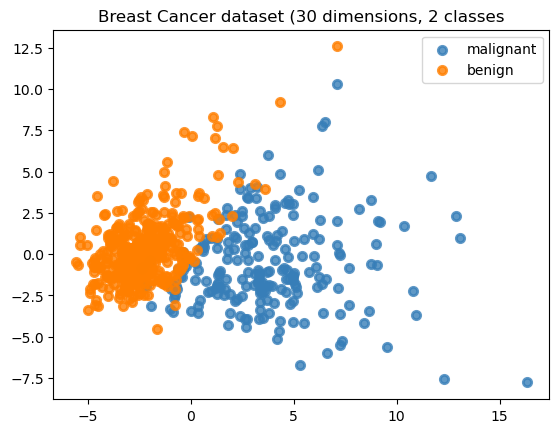

In [18]:
# Perform PCA
breast_cancer_pca = skdc.PCA(n_components=2)
breast_cancer_X_pca = breast_cancer_pca.fit_transform(breast_cancer_X)

# Define colors
colors = np.array(list(itertools.islice(itertools.cycle(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']), len(np.unique(breast_cancer_y)))))

# Create plot
plt.figure()
for color, i, target_name in zip(colors, np.unique(breast_cancer_y), breast_cancer.target_names):
    plt.scatter(breast_cancer_X_pca[breast_cancer_y == i, 0], breast_cancer_X_pca[breast_cancer_y == i, 1], color=color, alpha=.8, lw=2,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Breast Cancer dataset (30 dimensions, 2 classes')
plt.show()


In [19]:
# Store the accuracies in an array
breast_cancer_accuracies = np.zeros((1,2))

# Create a 1x2 dictionary to store the accuracy records
breast_cancer_accuracy_dict = {cost: [] for cost in cost_metrics}

for c,cost in enumerate(cost_metrics):
    # Initialize the KGenCenters object with 'forgy' initialization
    kgen = KGenCenters(n_clusters=2, init='forgy', max_iter=400, random_state=None, verbose=False)

    n_trials = 100
    breast_cancer_acc_record = np.empty(n_trials)
    for trial in range(n_trials):
        # Set the random state
        kgen.random_state = trial
        # Fit the model
        kgen.fit(breast_cancer_X, cost_metric=cost, tolerance=1e-5, max_steps=100)
        # Compute the accuracy
        breast_cancer_acc_record[trial] = kgen.evaluate(breast_cancer_y)
    # Compute the mean of the accuracies
    breast_cancer_accuracies[0,c] = np.mean(breast_cancer_acc_record)
    # Store the accuracy records
    breast_cancer_accuracy_dict[cost] = breast_cancer_acc_record


## Results

In [20]:
# Define your labels for the axes
dataset_labels = ['Iris', 'Seeds', 'E. Coli', 'Glass', 'Wine', 'Breast Cancer']

# Gather all accuracies in one 2D array
all_accuracies = np.vstack((iris_accuracies, seeds_accuracies, ecoli_accuracies, glass_accuracies, wine_accuracies, breast_cancer_accuracies))

# Convert the numpy array to pandas DataFrame and multiply by 100 to move decimal two places to the right
df_accuracies = pd.DataFrame(all_accuracies * 100, index=dataset_labels, columns=['k-Means', 'k-Medians'])

# Create a function to apply a serif font
def apply_font(s):
    return ['font-family: serif' for v in s]

# Create a function to highlight the maximum in a Series
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: plum' if v else '' for v in is_max]

# Apply the font, add borders and color the cells
df_accuracies_styled = df_accuracies.style.apply(apply_font).apply(highlight_max, axis=1)

df_accuracies_styled.set_table_styles([
    {
        'selector': 'th',
        'props': [
            ('border', '1px solid black'),
            ('font-family', 'serif'),
            ('padding', '8px 30px'),  # Increased right and left padding
            ('text-align', 'center')  # Center the text
        ]
    },
    {
        'selector': 'td',
        'props': [
            ('border', '1px solid black'),
            ('padding', '8px 30px'),  # Increased right and left padding
            ('text-align', 'center')  # Center the text
        ]
    },
    {
        'selector': 'tr:nth-of-type(even)',
        'props': [
            ('background', 'white'),
        ]
    },
    {
        'selector': 'tr:nth-of-type(odd)',
        'props': [
            ('background', 'white'),
        ]
    },
    # Add a black border around the table
    {
        'selector': '',
        'props': [
            ('border', '1px solid black'),
        ]
    }
], overwrite=False)  # Do not overwrite previous styles

# Set precision to two decimal places
df_accuracies_styled.format("{:.2f}")

df_accuracies_styled


,k-Means,k-Medians
Iris,79.57,78.73
Seeds,91.71,90.82
E. Coli,74.47,74.85
Glass,44.84,42.29
Wine,94.31,95.82
Breast Cancer,90.80,91.62
